In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
import time
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training labels shape: (60000,)
Testing labels shape: (10000,)


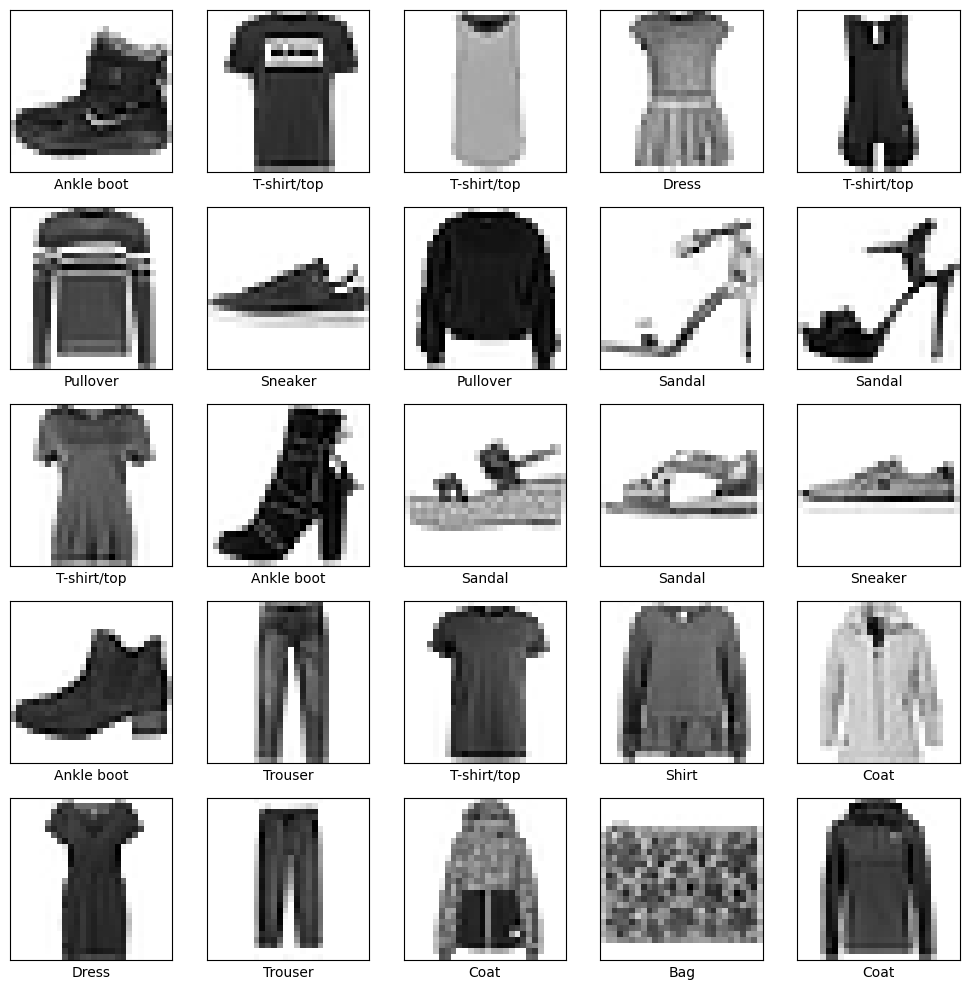

In [3]:
# Step 1: Data Loading and Exploration

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names for better interpretability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Display some example images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.savefig('sample_images.png')
plt.show()
plt.close()



Missing values in training data: False
Missing values in testing data: False


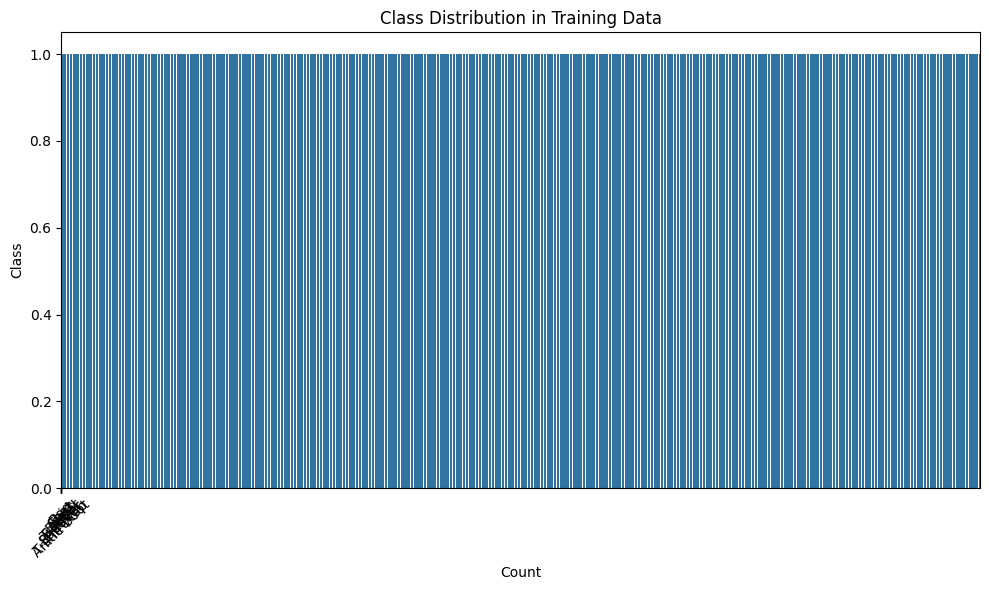

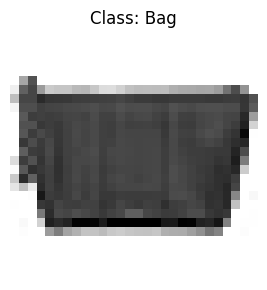

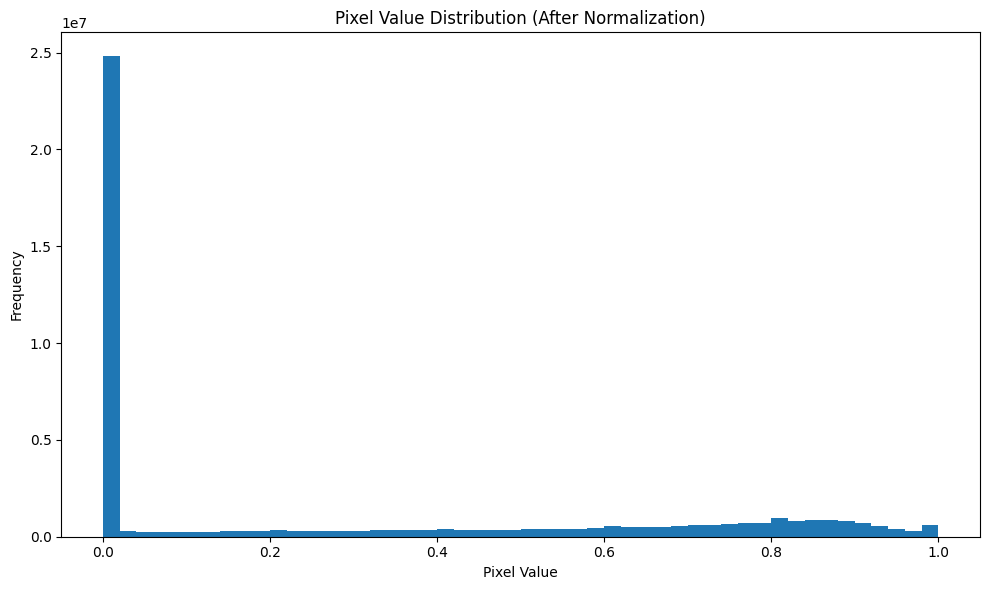

In [4]:
# Step 2: Data Preprocessing

# Check for missing values
print("Missing values in training data:", np.isnan(X_train).any())
print("Missing values in testing data:", np.isnan(X_test).any())

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data distribution exploration
plt.figure(figsize=(10, 6))
sns.countplot(y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Class')
plt.xticks(range(10), class_names, rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('class_distribution.png')
plt.close()

# Convert labels to one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# Define a function to show a random image
def show_random_image(X, y, class_names):
    idx = np.random.randint(0, len(X))
    plt.figure(figsize=(3, 3))
    plt.imshow(X[idx], cmap=plt.cm.binary)
    plt.title(f"Class: {class_names[y[idx]]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig('random_image.png')
    plt.close()

show_random_image(X_train, y_train, class_names)
# View pixel value distribution
plt.figure(figsize=(10, 6))
plt.hist(X_train.ravel(), bins=50)
plt.title('Pixel Value Distribution (After Normalization)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.savefig('pixel_distribution.png')
plt.close()

In [5]:
# Step 3: Basic Model - Simple Neural Network

# Reshape the data for the dense model
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print("Flattened training data shape:", X_train_flattened.shape)
print("Flattened testing data shape:", X_test_flattened.shape)

# Create a basic neural network model
def create_basic_nn():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train the basic model
basic_model = create_basic_nn()

basic_history = basic_model.fit(
    X_train_flattened, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Evaluate the basic model
basic_loss, basic_accuracy = basic_model.evaluate(X_test_flattened, y_test_cat)
print(f"Basic Model - Test Accuracy: {basic_accuracy:.4f}")



Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6847 - loss: 0.8889 - val_accuracy: 0.8305 - val_loss: 0.4450
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8332 - loss: 0.4585 - val_accuracy: 0.8618 - val_loss: 0.3781
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.4070 - val_accuracy: 0.8656 - val_loss: 0.3703
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3810 - val_accuracy: 0.8727 - val_loss: 0.3550
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8635 - loss: 0.3697 - val_accuracy: 0.8727 - val_loss: 0.3478
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.3403 - val_accuracy: 0.8804 - val_loss: 0.3305
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3368 - val_accuracy: 0.8763 - val_loss: 0.3427
Epoch 8/10
750/75

In [ ]:
# Step 4: CNN Model

# Reshape data for CNN (add channel dimension)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

print("CNN training data shape:", X_train_cnn.shape)
print("CNN testing data shape:", X_test_cnn.shape)

# Create a CNN model
def create_cnn_model():
    model = keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        
        # First convolutional block
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # Second convolutional block
        layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        
        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train the CNN model
cnn_model = create_cnn_model()

# Define callbacks for the CNN model
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat)
print(f"CNN Model - Test Accuracy: {cnn_accuracy:.4f}")

# Step 5: Vision Transformer (ViT) Model

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size
        
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID"
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_model():
    # ViT hyperparameters
    input_shape = (28, 28, 1)
    patch_size = 4  # Size of the patches to be extracted from the input images
    num_patches = (28 // patch_size) ** 2  # Number of patches 
    projection_dim = 64  # Embedding dimension
    transformer_layers = 4
    num_heads = 4  # Number of attention heads
    transformer_units = [projection_dim * 2, projection_dim]  # Size of the transformer layers
    mlp_head_units = [2048, 1024]  # Size of the MLP head
    
    # Create the model
    inputs = layers.Input(shape=input_shape)
    
    # Create patches
    patches = Patches(patch_size)(inputs)
    
    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    
    # Create Transformer blocks
    for _ in range(transformer_layers):
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        
        # Skip connection 1
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        
        # MLP
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        
        # Skip connection 2
        encoded_patches = layers.Add()([x3, x2])
    
    # Layer normalization
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    
    # Global average pooling
    representation = layers.GlobalAveragePooling1D()(representation)
    
    # MLP head
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.2)
    
    # Classification head
    logits = layers.Dense(10, activation='softmax')(features)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=logits)
    
    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train the ViT model
vit_model = create_vit_model()

vit_callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

vit_history = vit_model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=vit_callbacks,
    verbose=1
)

# Evaluate the ViT model
vit_loss, vit_accuracy = vit_model.evaluate(X_test_cnn, y_test_cat)
print(f"ViT Model - Test Accuracy: {vit_accuracy:.4f}")



CNN training data shape: (60000, 28, 28, 1)
CNN testing data shape: (10000, 28, 28, 1)
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.7641 - loss: 0.7010 - val_accuracy: 0.8943 - val_loss: 0.2972 - learning_rate: 0.0010
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.8869 - loss: 0.3214 - val_accuracy: 0.8961 - val_loss: 0.2866 - learning_rate: 0.0010
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9033 - loss: 0.2706 - val_accuracy: 0.8909 - val_loss: 0.2888 - learning_rate: 0.0010
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - accuracy: 0.9080 - loss: 0.2537 - val_accuracy: 0.9126 - val_loss: 0.2322 - learning_rate: 0.0010
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.9148 - loss: 0.2352 - val_accuracy: 0.9177 - val_loss: 0.2268 - learning_rate: 0.0010
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.9209 - loss: 0.2196 - val_accuracy: 0.9247 - val_loss: 0.2113 - learning_ra

In [8]:
# Step 6: Combined Model - CNN + ViT Features

def create_combined_model():
    # CNN Feature Extractor
    cnn_input = layers.Input(shape=(28, 28, 1))
    
    # CNN Part
    x = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(cnn_input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    
    x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    
    cnn_features = layers.Flatten()(x)
    
    # ViT Feature Extractor (simplified)
    # Patch extraction and encoding
    patches = Patches(4)(cnn_input)
    encoded_patches = PatchEncoder((28 // 4) ** 2, 64)(patches)
    
    # Single Transformer block
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    attention_output = layers.MultiHeadAttention(
        num_heads=4, key_dim=64, dropout=0.1
    )(x1, x1)
    x2 = layers.Add()([attention_output, encoded_patches])
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    x3 = mlp(x3, hidden_units=[128, 64], dropout_rate=0.1)
    x4 = layers.Add()([x3, x2])
    
    x5 = layers.LayerNormalization(epsilon=1e-6)(x4)
    vit_features = layers.GlobalAveragePooling1D()(x5)
    
    # Combine features
    combined_features = layers.Concatenate()([cnn_features, vit_features])
    
    # Classification head
    x = layers.Dense(256, activation='relu')(combined_features)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    # Create the model
    model = keras.Model(inputs=cnn_input, outputs=outputs)
    
    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train the combined model
combined_model = create_combined_model()

combined_callbacks = [
    keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

combined_history = combined_model.fit(
    X_train_cnn, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=combined_callbacks,
    verbose=1
)

# Evaluate the combined model
combined_loss, combined_accuracy = combined_model.evaluate(X_test_cnn, y_test_cat)
print(f"Combined Model - Test Accuracy: {combined_accuracy:.4f}")


Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.7535 - loss: 0.7288 - val_accuracy: 0.8817 - val_loss: 0.3164 - learning_rate: 5.0000e-04
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.8744 - loss: 0.3537 - val_accuracy: 0.8743 - val_loss: 0.3372 - learning_rate: 5.0000e-04
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.8966 - loss: 0.2901 - val_accuracy: 0.9055 - val_loss: 0.2602 - learning_rate: 5.0000e-04
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9116 - loss: 0.2455 - val_accuracy: 0.9152 - val_loss: 0.2350 - learning_rate: 5.0000e-04
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9216 - loss: 0.2182 - val_accuracy: 0.9004 - val_loss: 0.2646 - learning_rate: 5.0000e-04
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9274 - loss: 0.2000 - val_accuracy: 0.9166 - val_loss: 0.2374 - learning_rate: 5.0000e-04
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/ste

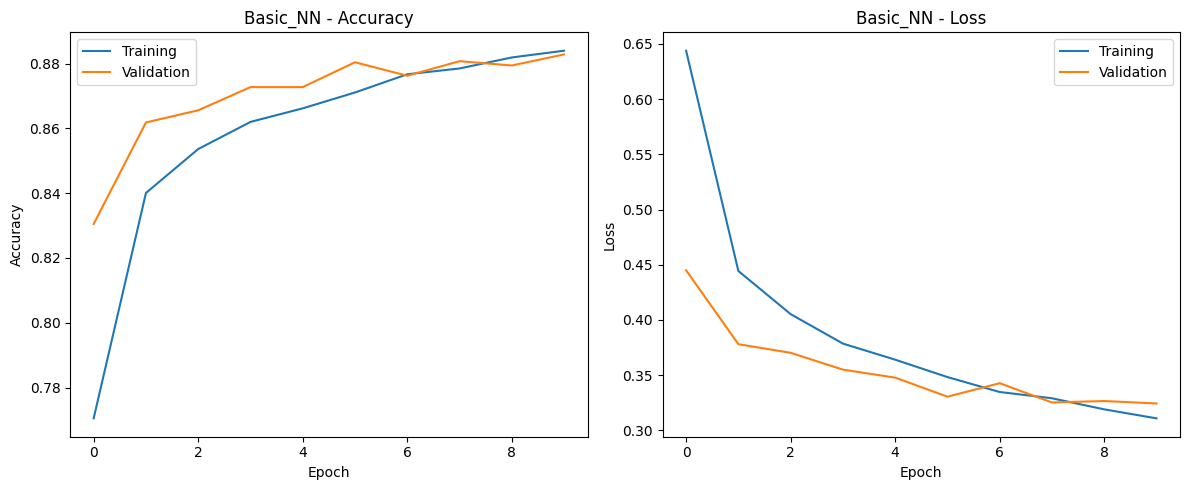

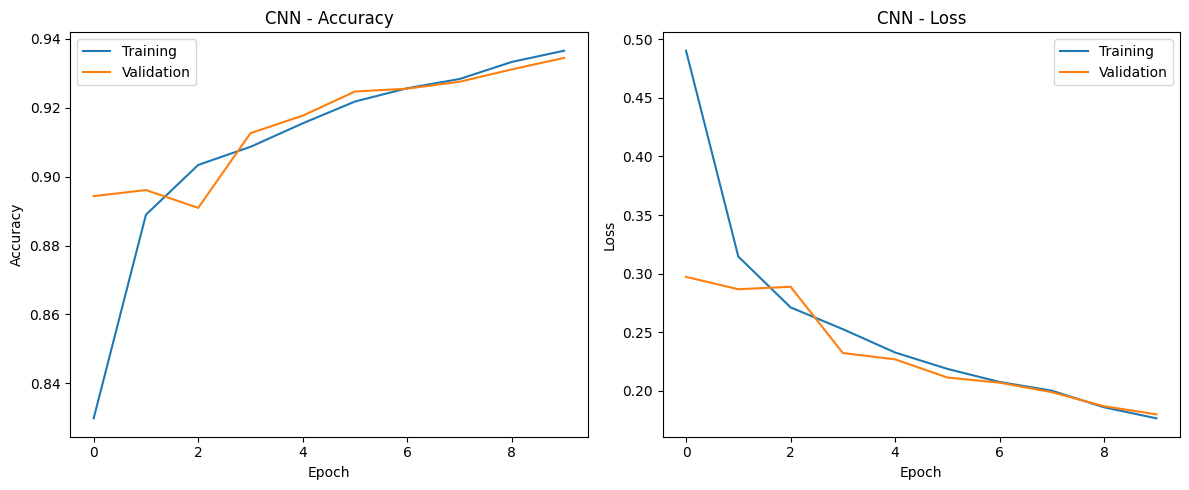

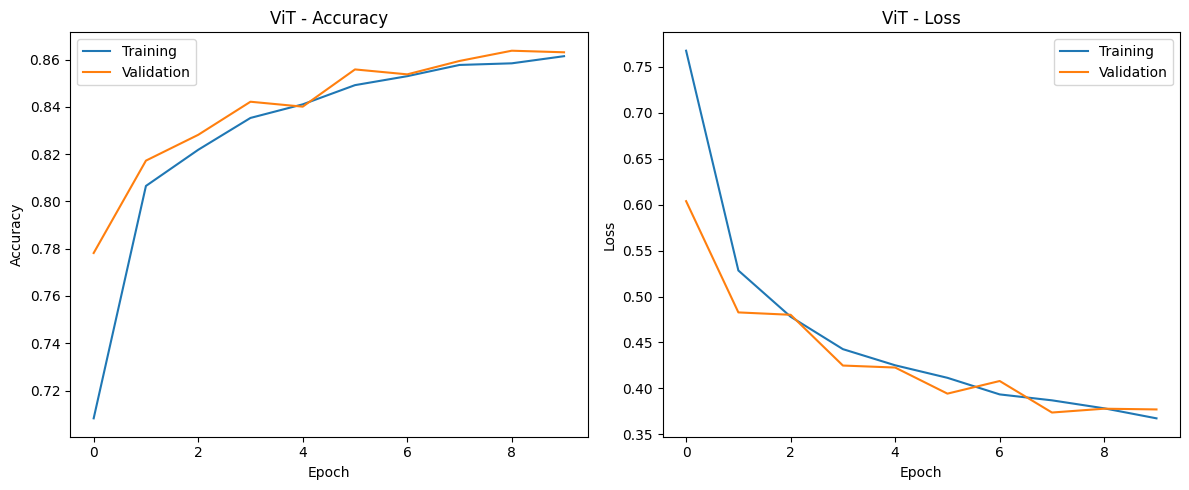

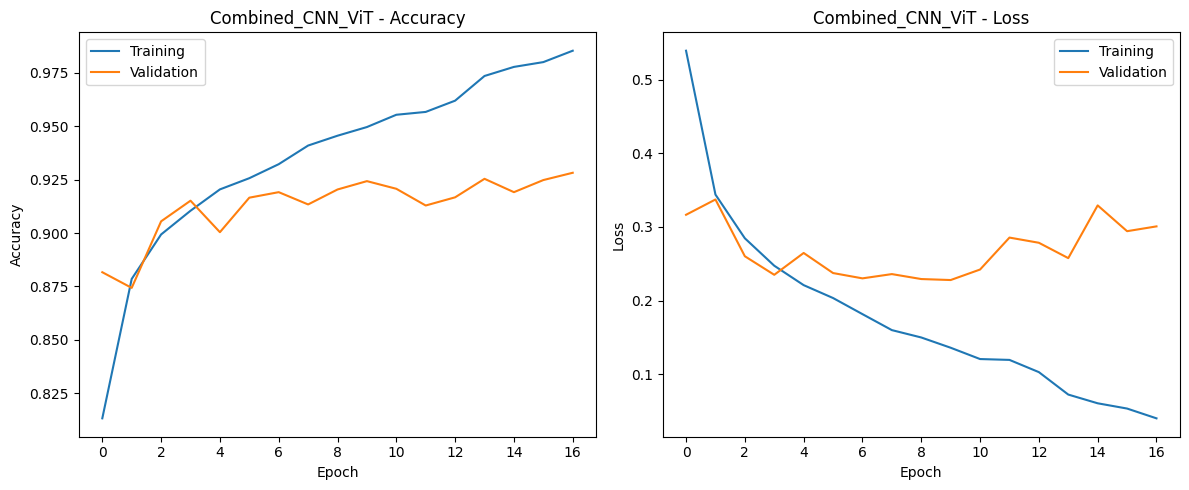

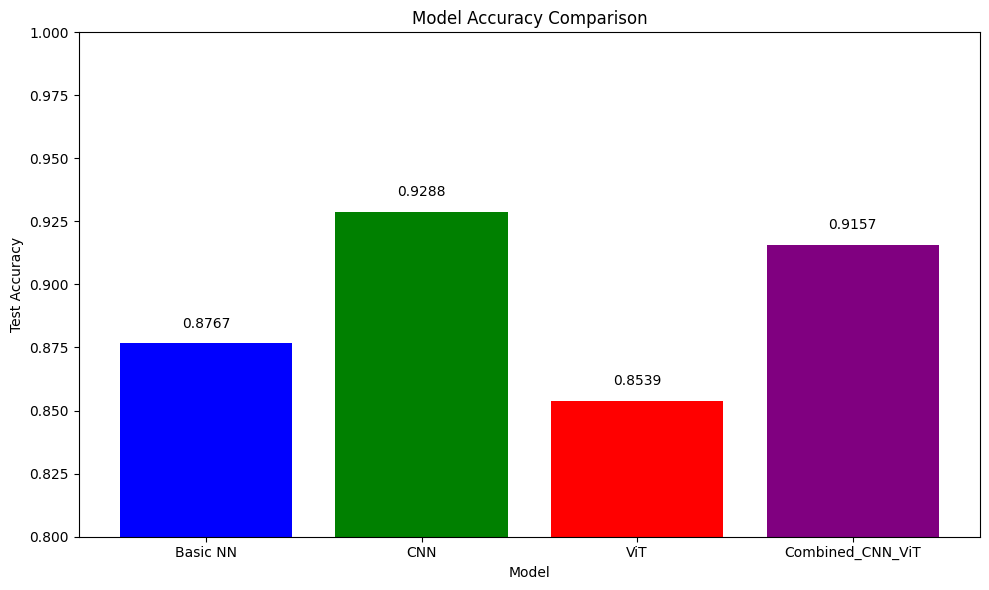

In [9]:

# Step 7: Model Comparison and Visualization

# Plot training history for all models
def plot_training_history(history_dict, model_name):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['accuracy'], label='Training')
    plt.plot(history_dict['val_accuracy'], label='Validation')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history_dict['loss'], label='Training')
    plt.plot(history_dict['val_loss'], label='Validation')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_training_history.png')
    plt.show()
    plt.close()

# Plot training history for each model
plot_training_history(basic_history.history, 'Basic_NN')
plot_training_history(cnn_history.history, 'CNN')
plot_training_history(vit_history.history, 'ViT')
plot_training_history(combined_history.history, 'Combined_CNN_ViT')

# Compare model accuracies
models = ['Basic NN', 'CNN', 'ViT','Combined_CNN_ViT']
accuracies = [basic_accuracy, cnn_accuracy, vit_accuracy,combined_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0.8, 1.0)  # Adjust as needed

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
plt.close()



In [10]:
# Step 8: Confusion Matrix and Classification Report

# Get predictions from the best model (assuming combined model is best)
y_pred = combined_model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()

# Generate classification report
cr = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(cr)

# Save classification report to file
with open('classification_report.txt', 'w') as f:
    f.write(cr)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.84      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.89      0.94      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.77      0.75      0.76      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [11]:
# Step 9: Single Image Prediction Demo

def predict_single_image(model, image_idx, X_test, y_test, class_names):
    # Select a random image if no index is provided
    if image_idx is None:
        image_idx = np.random.randint(0, len(X_test))
    
    # Get the image and reshape it for the model
    image = X_test[image_idx]
    if len(image.shape) == 2:  # If it's a 2D image
        image_for_model = image.reshape(1, 28, 28, 1)
    else:  # Already has the right shape
        image_for_model = np.expand_dims(image, axis=0)
    
    # Make prediction
    prediction = model.predict(image_for_model)
    predicted_class = np.argmax(prediction)
    true_class = y_test[image_idx]
    
    # Display results
    plt.figure(figsize=(8, 6))
    plt.imshow(X_test[image_idx].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {class_names[predicted_class]} ({predicted_class})\nActual: {class_names[true_class]} ({true_class})')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('single_image_prediction.png')
    plt.close()
    
    # Display prediction probabilities
    plt.figure(figsize=(10, 4))
    plt.bar(class_names, prediction[0])
    plt.title('Prediction Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('prediction_probabilities.png')
    plt.close()
    
    return predicted_class, true_class, prediction[0]

# Make single image prediction
predicted_class, true_class, probabilities = predict_single_image(
    combined_model, None, X_test, y_test, class_names
)

print(f"Predicted class: {class_names[predicted_class]} ({predicted_class})")
print(f"Actual class: {class_names[true_class]} ({true_class})")
print("Prediction probabilities:", probabilities)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: Sneaker (7)
Actual class: Sneaker (7)
Prediction probabilities: [1.5690329e-09 9.6021191e-11 3.3255667e-09 2.9800454e-10 2.4523206e-09
 2.2392320e-04 5.5918387e-10 9.9976331e-01 4.0072571e-08 1.2821460e-05]


In [16]:
# Step 10: Model Architecture Visualization

from tensorflow.keras.utils import plot_model

# Visualize model architectures
plot_model(basic_model, to_file='basic_model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(cnn_model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(vit_model, to_file='vit_model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(combined_model, to_file='combined_model_architecture.png', show_shapes=True, show_layer_names=True)

# Step 11: Save Models
basic_model.save('basic_model.h5')
cnn_model.save('cnn_model.h5')
vit_model.save('vit_model.h5')
combined_model.save('combined_model.h5')

print("All models saved successfully!")

# Step 12: Create a logical diagram of model architecture
# This step can be done using the generated architecture plots

# Step 13: Summary of model performances
print("\nModel Performance Summary:")
print(f"Basic NN Accuracy: {basic_accuracy:.4f}")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"ViT Accuracy: {vit_accuracy:.4f}")
print(f"Combined CNN+ViT Accuracy: {combined_accuracy:.4f}")

print("\nProject completed successfully!")


You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.


All models saved successfully!

Model Performance Summary:
Basic NN Accuracy: 0.8767
CNN Accuracy: 0.9288
ViT Accuracy: 0.8539
Combined CNN+ViT Accuracy: 0.9157

Project completed successfully!


In [ ]:
from tensorflow.keras.utils import plot_model

# Save model architecture visualizations
plot_model(basic_model, to_file='basic_model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(cnn_model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(vit_model, to_file='vit_model_architecture.png', show_shapes=True, show_layer_names=True)
plot_model(combined_model, to_file='combined_model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
You must install pydot (`pip install pydot`) for `plot_model` to work.
